In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/uiuc-cse/data-fa14/gh-pages/data/iris.csv')

In [3]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Univariate Analysis

In [4]:
df_setosa=df.loc[df['species']=='setosa']
df_virginica=df.loc[df['species']=='virginica']
df_versicolor=df.loc[df['species']=='versicolor']

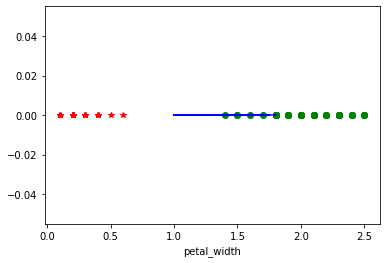

In [5]:
column = 'petal_width'
plt.plot(df_setosa[column],np.zeros_like(df_setosa[column]),'*', c='r')
plt.plot(df_virginica[column],np.zeros_like(df_virginica[column]),'o', c='g')
plt.plot(df_versicolor[column],np.zeros_like(df_versicolor[column]),'--', c='b')
plt.xlabel(column)
plt.show()

### Bivariate Analysis

c:\users\karthik.bicsglobal\appdata\local\programs\python\python37\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


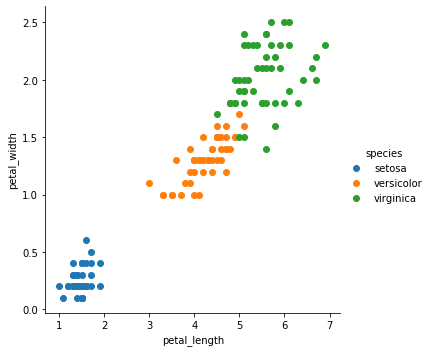

In [6]:
sns.FacetGrid(df, hue="species", size=5).map(plt.scatter, "petal_length", "petal_width").add_legend()
plt.show()

### Multivariate Analysis

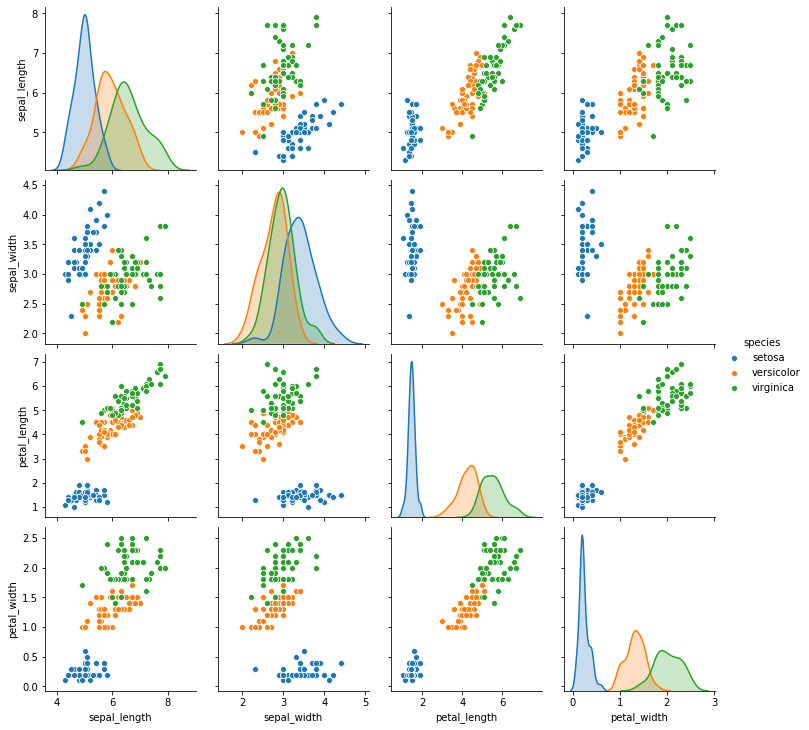

In [7]:
sns.pairplot(df, hue="species")

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('species',axis=1), 
                                                    df['species'], test_size=0.2, 
                                                    random_state=101)

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

c:\users\karthik.bicsglobal\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [12]:
predictions = logmodel.predict(X_test)

In [13]:
from sklearn.metrics import accuracy_score

In [14]:
accuracy=accuracy_score(y_test,predictions)
accuracy

1.0

In [15]:
from xgboost import XGBClassifier